In [131]:
import pandas as pd
import glob
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
%matplotlib inline


In [124]:
# load files
filenames = glob.glob("./TrainData/6/*")
files = [pd.read_json(filename) for filename in filenames]
static = pd.read_csv('./TrainData/static/north_ave_red_n.csv')
# create dataset from files
dataset = pd.concat(files)
#print(static)


In [177]:
# select station + direction here
station = "NORTH AVE STATION"
destination = "North Springs"

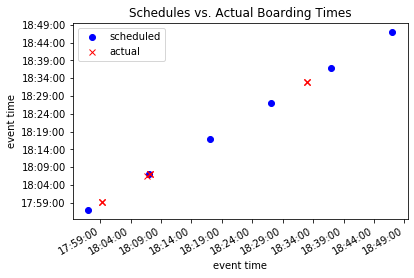

In [184]:
subset = dataset[(dataset.WAITING_TIME == "Boarding") & (dataset.STATION == station)]
event_times = subset[subset.DESTINATION == destination].sort_values("EVENT_TIME")
schedule = pd.to_datetime(static['Schedule'])
schedule.index = schedule
sub_schedule = schedule.between_time("17:50", "18:50")

fig, ax = plt.subplots()
minutes = mdates.MinuteLocator(interval = 5)
h_fmt = mdates.DateFormatter('%H:%M:%S')

ax.plot(sub_schedule, sub_schedule, "bo", label="scheduled")
ax.plot(event_times["EVENT_TIME"], event_times["EVENT_TIME"], "rx", label="actual")
plt.legend(loc='upper left')
plt.title("Schedules vs. Actual Boarding Times")
plt.xlabel("event time")
plt.ylabel("event time")
ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(h_fmt)
ax.yaxis.set_major_locator(minutes)
ax.yaxis.set_major_formatter(h_fmt)
fig.autofmt_xdate()
plt.show()
